In [2]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [3]:
file_path = 'fruit_dataset.csv'

In [4]:
df = pd.read_csv(file_path)

In [5]:
df = df[df['Commodity'] == 'Ginger']

In [6]:
df['Commodity'].value_counts()

Commodity
Ginger    2751
Name: count, dtype: int64

In [7]:
data = pd.date_range(start='2013-06-16', end='2020-12-26', freq='D')
df['Data'] = data
df.set_index('Data', inplace=True)

In [8]:
media = df['Average'].rolling(window=60, min_periods=2).mean()
desvio = df['Average'].rolling(window=60, min_periods=2).std()

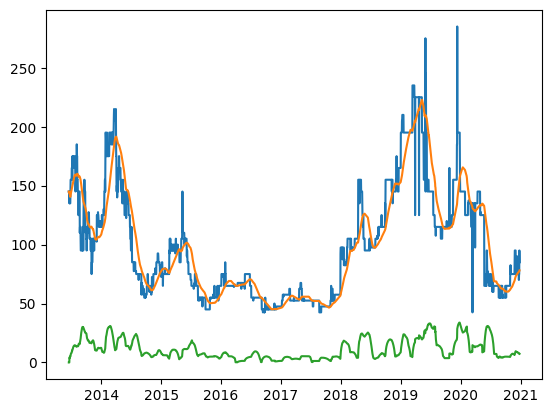

In [9]:
plt.plot(df['Average'], label='sells')
plt.plot(media, label='media')
plt.plot(desvio, label=desvio)

In [10]:
serie_gengibre = df[['Average']]

# max_values_each_year = df.resample('Y').max()
# min_values_each_year = df.resample('Y').min()
# print(max_values_each_year)

# print(min_values_each_year)

In [11]:
decomp = seasonal_decompose(serie_gengibre, model='additive', period=365)

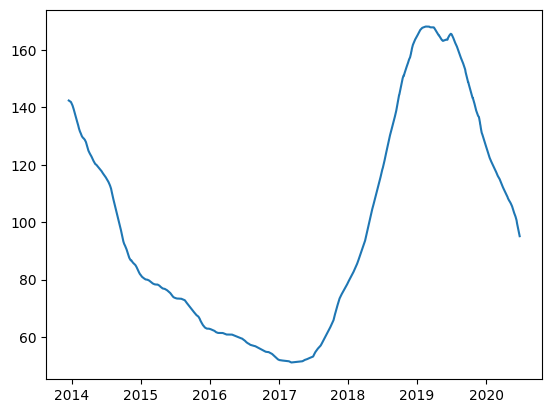

In [12]:
plt.plot(decomp.trend, label='trend')

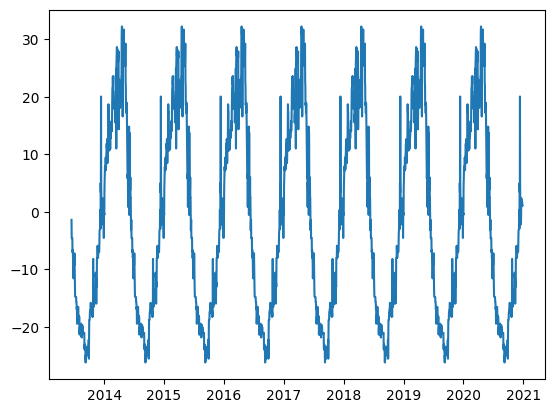

In [13]:
plt.plot(decomp.seasonal, label='trend')

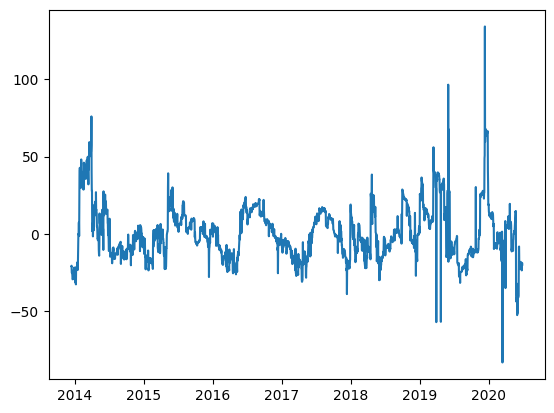

In [14]:
plt.plot(decomp.resid, label='trend')

In [15]:
import statsmodels.api as sm

In [16]:
df['Date'] = pd.to_datetime(df['Date'])

# Calculate daily average
daily_average = df.groupby(df['Date'].dt.date)['Average'].mean()

# Calculate monthly average
monthly_average = df.groupby(df['Date'].dt.to_period('M'))['Average'].mean()

# Calculate the overall average
overall_average = monthly_average.mean()

In [17]:
monthly_average

Date
2013-06    140.454545
2013-07    165.400000
2013-08    163.375000
2013-09    120.000000
2013-10    123.148148
              ...    
2021-01     60.080645
2021-02     60.000000
2021-03     70.250000
2021-04     80.500000
2021-05     77.692308
Freq: M, Name: Average, Length: 96, dtype: float64

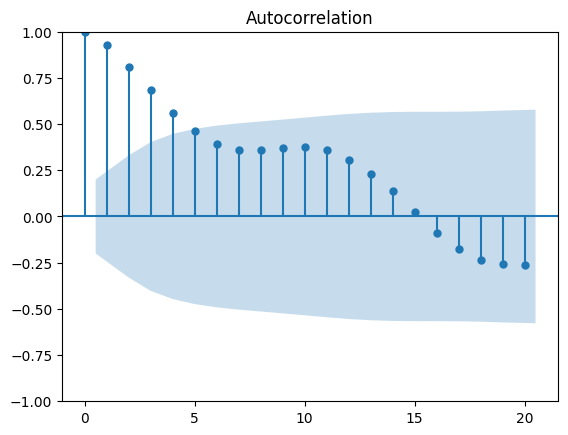

In [18]:
sm.graphics.tsa.plot_acf(monthly_average, lags=20)
plt.show()

Augumented Dickey-fuller

In [19]:
from statsmodels.tsa.stattools import adfuller
adftest = adfuller(df['Average'])

out = pd.Series(adftest[0:4], index=['Teste','p-valor','Lags','Número de observações usadas'])
for key,value in adftest[4].items():
    out['Valor crítico (%s)'%key] = value
print(out)

Teste                             -2.332293
p-valor                            0.161764
Lags                              25.000000
Número de observações usadas    2725.000000
Valor crítico (1%)                -3.432752
Valor crítico (5%)                -2.862601
Valor crítico (10%)               -2.567335
dtype: float64


In [20]:
test = df[df['Commodity'] == "Ginger"]

In [21]:
test = test[['Average', 'Date']]

In [22]:
test['Date'] = pd.to_datetime(test['Date'])

max_2013 = test[test['Date'] < '2014-01-01']
max_2014 = test[(test['Date'] >= '2014-01-01') & (test['Date'] < '2015-01-01')]
max_2015 = test[(test['Date'] >= '2015-01-01') & (test['Date'] < '2016-01-01')]
max_2016 = test[(test['Date'] >= '2016-01-01') & (test['Date'] < '2017-01-01')]
max_2017 = test[(test['Date'] >= '2017-01-01') & (test['Date'] < '2018-01-01')]
max_2018 = test[(test['Date'] >= '2018-01-01') & (test['Date'] < '2019-01-01')]
max_2019 = test[(test['Date'] >= '2019-01-01') & (test['Date'] < '2020-01-01')]
max_2020 = test[(test['Date'] >= '2020-01-01') & (test['Date'] < '2021-01-01')]
max_2021 = test[(test['Date'] >= '2021-01-01') & (test['Date'] < '2022-01-01')]
print(max_2013.loc[max_2013['Average'].idxmax()])
print(max_2014.loc[max_2014['Average'].idxmax()])
print(max_2015.loc[max_2015['Average'].idxmax()])
print(max_2016.loc[max_2016['Average'].idxmax()])
print(max_2017.loc[max_2017['Average'].idxmax()])
print(max_2018.loc[max_2018['Average'].idxmax()])
print(max_2019.loc[max_2019['Average'].idxmax()])
print(max_2020.loc[max_2020['Average'].idxmax()])
print(max_2021.loc[max_2021['Average'].idxmax()])
max_values = pd.concat([
    max_2013.loc[max_2013['Average'].idxmax()],
    max_2014.loc[max_2014['Average'].idxmax()],
    max_2015.loc[max_2015['Average'].idxmax()],
    max_2016.loc[max_2016['Average'].idxmax()],
    max_2017.loc[max_2017['Average'].idxmax()],
    max_2018.loc[max_2018['Average'].idxmax()],
    max_2019.loc[max_2019['Average'].idxmax()],
    max_2020.loc[max_2020['Average'].idxmax()],
    max_2021.loc[max_2021['Average'].idxmax()]
])

print(max_values)

Average                  185.0
Date       2013-08-20 00:00:00
Name: 2013-08-04 00:00:00, dtype: object
Average                  215.0
Date       2014-06-08 00:00:00
Name: 2014-03-20 00:00:00, dtype: object
Average                  145.0
Date       2015-08-30 00:00:00
Name: 2015-05-11 00:00:00, dtype: object
Average                   85.0
Date       2016-05-19 00:00:00
Name: 2016-01-27 00:00:00, dtype: object
Average                   67.5
Date       2017-08-25 00:00:00
Name: 2017-04-30 00:00:00, dtype: object
Average                  155.0
Date       2018-08-22 00:00:00
Name: 2018-04-17 00:00:00, dtype: object
Average                  275.0
Date       2019-10-07 00:00:00
Name: 2019-06-01 00:00:00, dtype: object
Average                  285.0
Date       2020-04-26 00:00:00
Name: 2019-12-12 00:00:00, dtype: object
Average                   95.0
Date       2021-04-14 00:00:00
Name: 2020-11-27 00:00:00, dtype: object
Average                  185.0
Date       2013-08-20 00:00:00
Average    

In [25]:
max_values

Average                  185.0
Date       2013-08-20 00:00:00
Average                  215.0
Date       2014-06-08 00:00:00
Average                  145.0
Date       2015-08-30 00:00:00
Average                   85.0
Date       2016-05-19 00:00:00
Average                   67.5
Date       2017-08-25 00:00:00
Average                  155.0
Date       2018-08-22 00:00:00
Average                  275.0
Date       2019-10-07 00:00:00
Average                  285.0
Date       2020-04-26 00:00:00
Average                   95.0
Date       2021-04-14 00:00:00
dtype: object